In [181]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
#A changer selon le pc
path_fichier = "C:\\Users\\rober\\OneDrive\\Documents\\SuperProf_Python\\Elena\\TP6\\data_brutes\\"

products_df = pd.read_csv(path_fichier+"products.csv",sep = ",",encoding = "ISO-8859-1")
customers_df = pd.read_csv(path_fichier+"customers.csv",sep = ",",encoding = "ISO-8859-1")
transactions_df = pd.read_csv(path_fichier+"transactions.csv",sep = ",",encoding = "ISO-8859-1")

In [3]:
#1 - Nettoyage des données

In [4]:
products_df

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [5]:
#On constate qu'il y a une ligne inferieure dont le prix est inferieure à zero
print(products_df[products_df["price"]<0])

    id_prod  price  categ
731     T_0   -1.0      0


In [6]:
#Suppression des prix incoherents
products_df = products_df[products_df["price"]>=0]

In [7]:
transactions_df

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [8]:
#On extrait uniquement l'année dans la colonne date pour avoir le meme element pour comparer ensuite avec la colonne birth de customers

transactions_df.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [9]:
transactions_df["date_2"] = transactions_df["date"]

In [10]:
transactions_df["date"] = transactions_df["date"].str.split("-", n = 1, expand = True)
transactions_df["date_2"] = transactions_df["date_2"].str.split(" ", n = 1, expand = True)
transactions_df

,id_prod,date,session_id,client_id,date_2
0,0_1518,2022,s_211425,c_103,2022-05-20
1,1_251,2022,s_158752,c_8534,2022-02-02
2,0_1277,2022,s_225667,c_6714,2022-06-18
3,2_209,2021,s_52962,c_6941,2021-06-24
4,0_1509,2023,s_325227,c_4232,2023-01-11
...,...,...,...,...,...
679527,0_1551,2022,s_150195,c_8489,2022-01-15
679528,1_639,2022,s_181434,c_4370,2022-03-19
679529,0_1425,2022,s_314704,c_304,2022-12-20
679530,0_1994,2021,s_63204,c_2227,2021-07-16


In [11]:
set(transactions_df["date"])

{'2021', '2022', '2023', 'test_2021'}

In [12]:
#La valeur test est incoherente dans la colonne date, on supprime les lignes avec les valeurs test
transactions_df = transactions_df[transactions_df["date"]!="test_2021"]
set(transactions_df["date"])

{'2021', '2022', '2023'}

In [13]:
# Conversion de la date en int de la table transaction
transactions_df["date"] = pd.to_numeric(transactions_df["date"])
transactions_df.dtypes

<ipython-input-13-4a274d2297d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_df["date"] = pd.to_numeric(transactions_df["date"])


id_prod       object
date           int64
session_id    object
client_id     object
date_2        object
dtype: object

In [14]:
#Suppresion de la colonne session_id qui n'a aucune valeur analytique

transactions_df = transactions_df.drop(["session_id"], axis=1)
transactions_df

,id_prod,date,client_id,date_2
0,0_1518,2022,c_103,2022-05-20
1,1_251,2022,c_8534,2022-02-02
2,0_1277,2022,c_6714,2022-06-18
3,2_209,2021,c_6941,2021-06-24
4,0_1509,2023,c_4232,2023-01-11
...,...,...,...,...
679527,0_1551,2022,c_8489,2022-01-15
679528,1_639,2022,c_4370,2022-03-19
679529,0_1425,2022,c_304,2022-12-20
679530,0_1994,2021,c_2227,2021-07-16


In [15]:
#Calcul de l'age selon l'année 2022
customers_df["Age_2022"]=2022-customers_df["birth"]

In [16]:
# 2 - Fusion des données en une seule table

#on visualise les valeurs dans chaque colonne que l'on souhaite fusionner pour verifier que l'on a les memes valeurs

print(len(list(set(transactions_df["id_prod"]))))
print(len(list(set(products_df["id_prod"]))))

print(len(list(set(transactions_df["client_id"]))))
print(len(list(set(customers_df["client_id"]))))



3266
3286
8600
8623


In [17]:
#Nettoyage des colonnes id_prod

#Tous les product_id de la table transactions_df ne sont dans la table products_df
print(len(set(transactions_df["id_prod"]).difference(set(products_df["id_prod"]))))

#Mais tous les product_id de la table products_df sont pas dans la table transactions_df
print(len(set(products_df["id_prod"]).difference(set(transactions_df["id_prod"]))))

1
21


In [18]:
print(set(transactions_df["id_prod"]).difference(set(products_df["id_prod"])))

print(set(products_df["id_prod"]).difference(set(transactions_df["id_prod"])))

{'0_2245'}
{'0_1014', '0_2308', '2_72', '0_322', '1_0', '0_1624', '0_1318', '2_86', '0_310', '0_1062', '0_1025', '0_510', '0_1645', '0_1016', '0_299', '0_1800', '0_1119', '2_87', '0_1780', '0_1620', '1_394'}


In [19]:
#suppression de tous les id_prod qui ne sont pas dans les colonnes de l'autre table

transactions_df = transactions_df[transactions_df["id_prod"].isin(products_df["id_prod"])]

products_df = products_df[products_df["id_prod"].isin(transactions_df["id_prod"])]

In [20]:
#Tous les product_id de la table transactions_df ne sont dans la table products_df
print(len(set(transactions_df["id_prod"]).difference(set(products_df["id_prod"]))))

#Mais tous les product_id de la table products_df sont pas dans la table transactions_df
print(len(set(products_df["id_prod"]).difference(set(transactions_df["id_prod"]))))

0
0


In [21]:
#Nettoyage des colonnes client_id

#Tous les product_id de la table transactions_df ne sont dans la table products_df
print(len(set(transactions_df["client_id"]).difference(set(customers_df["client_id"]))))

#Mais tous les product_id de la table products_df sont pas dans la table transactions_df
print(len(set(customers_df["client_id"]).difference(set(transactions_df["client_id"]))))

0
23


In [22]:

print(set(customers_df["client_id"]).difference(set(transactions_df["client_id"])))

{'c_2706', 'c_862', 'c_3526', 'c_4358', 'c_6862', 'c_3789', 'c_3443', 'c_90', 'ct_1', 'c_6735', 'c_8253', 'c_8381', 'c_3017', 'c_5223', 'c_1223', 'c_4086', 'ct_0', 'c_4406', 'c_7584', 'c_4447', 'c_6930', 'c_5245', 'c_587'}


In [23]:
#suppression de tous les client_id qui ne sont pas dans les colonnes de l'autre table

customers_df = customers_df[customers_df["client_id"].isin(transactions_df["client_id"])]

print(len(set(transactions_df["client_id"]).difference(set(customers_df["client_id"]))))

0


In [24]:
#Les paires de données sont identiques, on peux maintenant fusionner

print(len(list(set(transactions_df["id_prod"]))))
print(len(list(set(products_df["id_prod"]))))

print(len(list(set(transactions_df["client_id"]))))
print(len(list(set(customers_df["client_id"]))))

3265
3265
8600
8600


In [25]:
#fusion des tables transactions et products selon l'id_prod

data_fusionned = pd.merge(transactions_df, products_df,on=["id_prod"])
data_fusionned

,id_prod,date,client_id,date_2,price,categ
0,0_1518,2022,c_103,2022-05-20,4.18,0
1,0_1518,2021,c_6197,2021-09-26,4.18,0
2,0_1518,2021,c_682,2021-05-06,4.18,0
3,0_1518,2022,c_5932,2022-03-16,4.18,0
4,0_1518,2022,c_7217,2022-11-12,4.18,0
...,...,...,...,...,...,...
679106,0_1279,2021,c_1025,2021-06-23,20.99,0
679107,0_1683,2021,c_5508,2021-12-24,2.99,0
679108,0_1379,2021,c_5425,2021-10-16,2.99,0
679109,0_886,2021,c_7219,2021-03-17,21.82,0


In [26]:
#fusion des tables transactions et customer selon le client_id en tenant compte de la fusion précedente

data_fusionned = pd.merge(data_fusionned, customers_df,on=["client_id"])
data_fusionned.dtypes

id_prod       object
date           int64
client_id     object
date_2        object
price        float64
categ          int64
sex           object
birth          int64
Age_2022       int64
dtype: object

In [27]:
#Calcul et affichage de l'age du client au moment de la transaction
data_fusionned["Age"] = data_fusionned["date"] - data_fusionned["birth"]

In [28]:
#3 analyse des données
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [29]:
#chiffres d'affaire par an
data_fusionned_2 = pd.DataFrame(data_fusionned.groupby('date')['price'].sum())
data_fusionned_2.reset_index(inplace=True)
data_fusionned_2

,date,price
0,2021,4.770827e+06
1,2022,6.108682e+06
2,2023,9.742203e+05


<AxesSubplot:xlabel='date'>

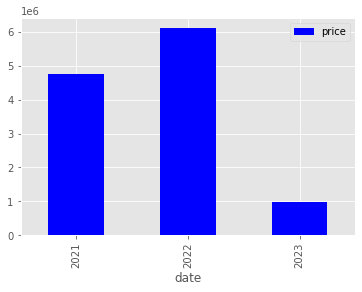

In [30]:
#Affichage du chiffre d'affaire par an

data_fusionned_2.plot(x="date",color="b", kind="bar")

In [31]:
#Calcul du chiffre d'affaire quotidien

data_fusionned_3 = pd.DataFrame(data_fusionned.groupby('date_2')['price'].sum())
data_fusionned_3.reset_index(inplace=True)
data_fusionned_3

,date_2,price
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


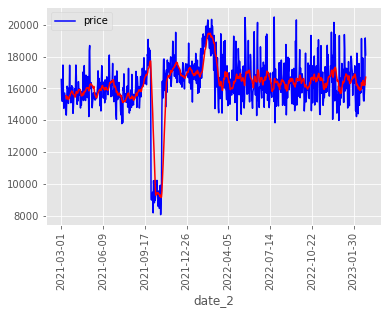

In [32]:
#Affichage du chiffre d'affaire quotidien ( en bleu ) avec la décomposition en moyenne mobile ( en rouge )

data_fusionned_3.plot(x="date_2",color="b", kind="line", rot=90)
mean_CA = data_fusionned_3.rolling(window = 12).mean()
plt.plot(mean_CA, color = 'red', label = 'Moyenne mobile')

In [33]:
#Zoom sur les deux tendances visibles à l'oeil nu

#Baisse du chiffre d'affaire 

data_fusionned_3_split_1 = data_fusionned_3[data_fusionned_3["date_2"]>"2021-09-17"]
data_fusionned_3_split_1 = data_fusionned_3_split_1[data_fusionned_3_split_1["date_2"]<"2021-11-15"]
data_fusionned_3_split_1

,date_2,price
201,2021-09-18,16712.77
202,2021-09-19,17098.08
203,2021-09-20,16725.86
204,2021-09-21,16238.97
205,2021-09-22,16739.79
206,2021-09-23,18137.76
207,2021-09-24,18027.80
208,2021-09-25,19080.29
209,2021-09-26,17419.29
210,2021-09-27,18542.39


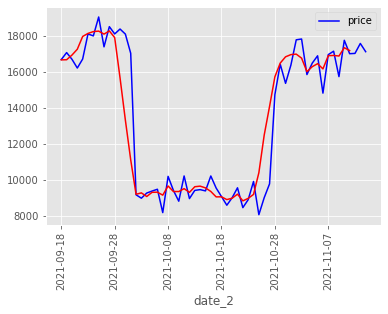

In [34]:
#Affichage de la baisse du chiffre d'affaire

data_fusionned_3_split_1.plot(x="date_2",color="b", kind="line", rot=90)
mean_CA_2 = data_fusionned_3_split_1.rolling(window = 4).mean()

mean_CA_2 = mean_CA_2.dropna()
mean_CA_2.reset_index(inplace=True)
mean_CA_2 = mean_CA_2.drop(["index"], axis=1)

plt.plot(mean_CA_2, color = 'red', label = 'Moyenne mobile')

In [35]:
#Zoom sur les deux tendances visibles à l'oeil nu

#Hausse du chiffre d'affaire 

data_fusionned_3_split_2 = data_fusionned_3[data_fusionned_3["date_2"]>"2022-01-10"]
data_fusionned_3_split_2 = data_fusionned_3_split_2[data_fusionned_3_split_2["date_2"]<"2022-03-15"]
data_fusionned_3_split_2

,date_2,price
316,2022-01-11,16587.82
317,2022-01-12,17413.87
318,2022-01-13,17451.42
319,2022-01-14,17557.46
320,2022-01-15,16965.93
...,...,...
374,2022-03-10,17931.23
375,2022-03-11,16070.89
376,2022-03-12,14796.59
377,2022-03-13,14473.82


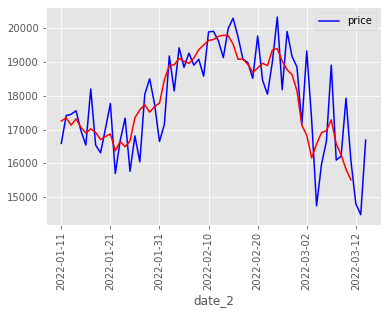

In [36]:
#Affichage de la hausse du chiffre d'affaire

data_fusionned_3_split_2.plot(x="date_2",color="b", kind="line", rot=90)

mean_CA_2 = data_fusionned_3_split_2.rolling(window = 4).mean()

mean_CA_2 = mean_CA_2.dropna()
mean_CA_2.reset_index(inplace=True)
mean_CA_2 = mean_CA_2.drop(["index"], axis=1)

plt.plot(mean_CA_2, color = 'red', label = 'Moyenne mobile')


In [37]:
data_fusionned

,id_prod,date,client_id,date_2,price,categ,sex,birth,Age_2022,Age
0,0_1518,2022,c_103,2022-05-20,4.18,0,f,1986,36,36
1,0_1518,2021,c_103,2021-07-20,4.18,0,f,1986,36,35
2,0_1518,2022,c_103,2022-08-20,4.18,0,f,1986,36,36
3,0_1418,2022,c_103,2022-06-18,8.57,0,f,1986,36,36
4,0_1418,2021,c_103,2021-08-18,8.57,0,f,1986,36,35
...,...,...,...,...,...,...,...,...,...,...
679106,2_147,2021,c_4391,2021-07-23,181.99,2,f,2001,21,20
679107,0_142,2022,c_1232,2022-03-25,19.85,0,f,1960,62,62
679108,0_142,2021,c_1232,2021-09-25,19.85,0,f,1960,62,61
679109,2_205,2021,c_7534,2021-03-11,100.99,2,m,1992,30,29


In [38]:
#Affichage du chiffre d'affaire par categorie par an

data_fusionned_4 = pd.DataFrame(data_fusionned.groupby(['date','categ'])['price'].sum())
data_fusionned_4.reset_index(inplace=True)

data_fusionned_4

,date,categ,price
0,2021,0,1.883020e+06
1,2021,1,1.777996e+06
2,2021,2,1.109810e+06
3,2022,0,2.192970e+06
4,2022,1,2.485275e+06
5,2022,2,1.430436e+06
6,2023,0,3.437401e+05
7,2023,1,3.904516e+05
8,2023,2,2.400286e+05


In [39]:
#Mise en forme de la dataframe pour l'affichage

data_fusionned_4 = data_fusionned_4.pivot(index='date', columns='categ', values='price')
data_fusionned_4

categ,0,1,2
date,,,
2021,1.883020e+06,1.777996e+06,1109810.26
2022,2.192970e+06,2.485275e+06,1430436.16
2023,3.437401e+05,3.904516e+05,240028.60


<AxesSubplot:xlabel='date'>

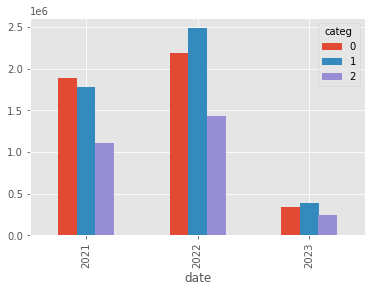

In [40]:
#Affichage du chiffre d'affaire par categorie et par année

data_fusionned_4.plot(kind="bar")


In [41]:
#Affichage du chiffre d'affaire quotidien par categorie

#Calcul du chiffre d'affaire
data_fusionned_5 = pd.DataFrame(data_fusionned.groupby(['date_2','categ'])['price'].sum())
data_fusionned_5.reset_index(inplace=True)
data_fusionned_5

,date_2,categ,price
0,2021-03-01,0,6262.65
1,2021-03-01,1,6811.53
2,2021-03-01,2,3491.04
3,2021-03-02,0,6718.27
4,2021-03-02,1,5627.15
...,...,...,...
2159,2023-02-27,1,6461.76
2160,2023-02-27,2,5271.62
2161,2023-02-28,0,4901.86
2162,2023-02-28,1,9226.25


In [42]:
#Mise en forme de la dataframe pour l'affichage

data_fusionned_5 = data_fusionned_5.pivot(index='date_2', columns='categ', values='price')
data_fusionned_5

categ,0,1,2
date_2,,,
2021-03-01,6262.65,6811.53,3491.04
2021-03-02,6718.27,5627.15,3141.03
2021-03-03,6121.03,5691.41,3386.25
2021-03-04,5891.48,6098.98,3205.61
2021-03-05,5975.97,7071.21,4424.19
...,...,...,...
2023-02-24,6197.92,5471.07,3538.90
2023-02-25,4942.69,8050.61,2767.95
2023-02-26,5522.90,7009.09,3772.73


<AxesSubplot:xlabel='date_2'>

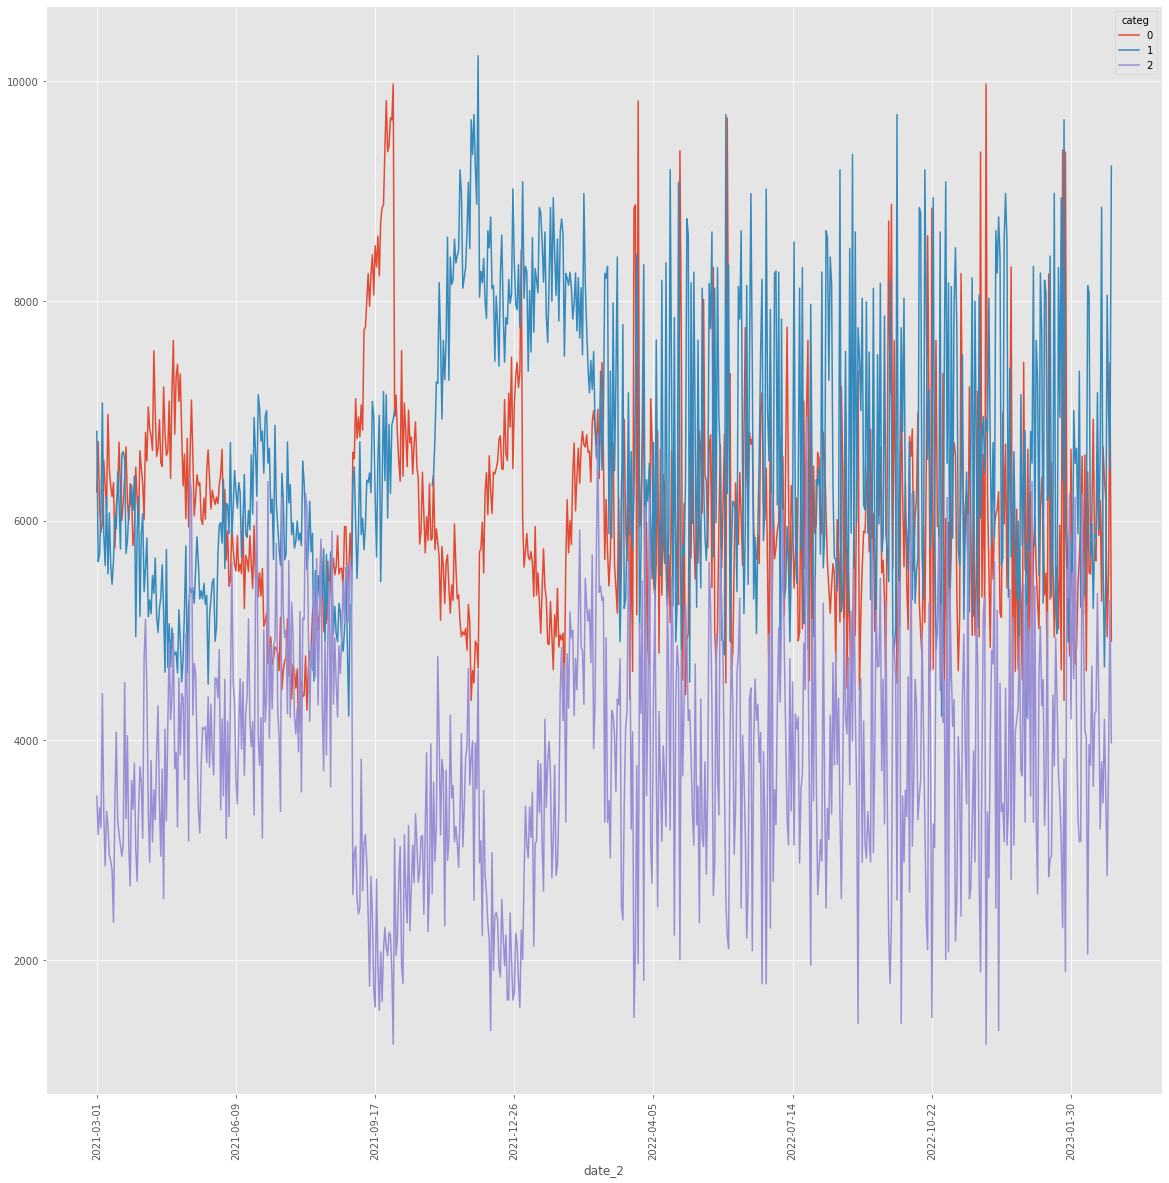

In [43]:
#Affichage du chiffre d'affaire par categorie quotidienne

#faisable mais illisible
data_fusionned_5.plot(kind="line", rot=90,figsize=(20,20))



<AxesSubplot:xlabel='date_2'>

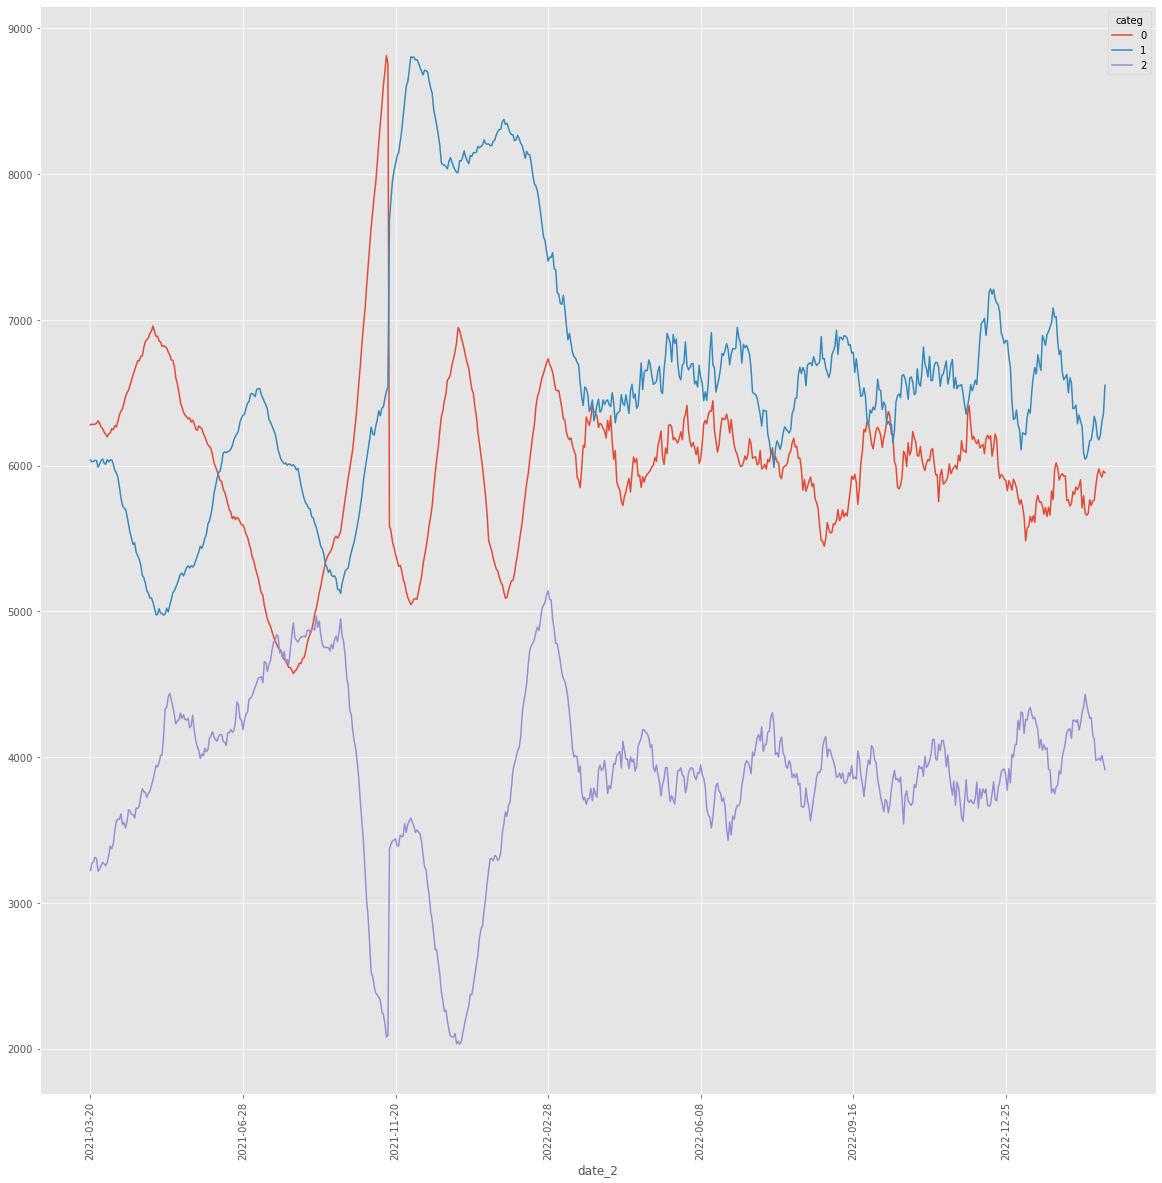

In [44]:
#Affichage du chiffre d'affaire par categorie quotidienne avec la décomposition en moyenne mobile

mean_CA_2 = data_fusionned_5.rolling(window = 20).mean()
mean_CA_2 = mean_CA_2.dropna()

mean_CA_2.plot(kind="line", rot=90,figsize=(20,20))

In [45]:
data_fusionned

,id_prod,date,client_id,date_2,price,categ,sex,birth,Age_2022,Age
0,0_1518,2022,c_103,2022-05-20,4.18,0,f,1986,36,36
1,0_1518,2021,c_103,2021-07-20,4.18,0,f,1986,36,35
2,0_1518,2022,c_103,2022-08-20,4.18,0,f,1986,36,36
3,0_1418,2022,c_103,2022-06-18,8.57,0,f,1986,36,36
4,0_1418,2021,c_103,2021-08-18,8.57,0,f,1986,36,35
...,...,...,...,...,...,...,...,...,...,...
679106,2_147,2021,c_4391,2021-07-23,181.99,2,f,2001,21,20
679107,0_142,2022,c_1232,2022-03-25,19.85,0,f,1960,62,62
679108,0_142,2021,c_1232,2021-09-25,19.85,0,f,1960,62,61
679109,2_205,2021,c_7534,2021-03-11,100.99,2,m,1992,30,29


In [46]:
#Selection de la periode 01/01/2021 au 31//2022 ( periode moins stable des ventes par catégorie) 
#pour observer les tops/flops des produits vendus sur cette periode
 
data_fusionned_periode_1 = data_fusionned[data_fusionned["date_2"]<"2022-04-01"]

data_fusionned_periode_1


,id_prod,date,client_id,date_2,price,categ,sex,birth,Age_2022,Age
1,0_1518,2021,c_103,2021-07-20,4.18,0,f,1986,36,35
4,0_1418,2021,c_103,2021-08-18,8.57,0,f,1986,36,35
6,0_2110,2021,c_103,2021-12-27,7.04,0,f,1986,36,35
7,0_1083,2021,c_103,2021-12-21,16.99,0,f,1986,36,35
8,1_381,2021,c_103,2021-03-09,15.99,1,f,1986,36,35
...,...,...,...,...,...,...,...,...,...,...
679104,2_147,2021,c_4540,2021-12-05,181.99,2,m,2003,19,18
679106,2_147,2021,c_4391,2021-07-23,181.99,2,f,2001,21,20
679107,0_142,2022,c_1232,2022-03-25,19.85,0,f,1960,62,62
679108,0_142,2021,c_1232,2021-09-25,19.85,0,f,1960,62,61


In [47]:
#Creation des dataframes par categorie ( 0, 1 et 2 )

data_fusionned_periode_1_categorie_0 = data_fusionned_periode_1[data_fusionned_periode_1["categ"]==0]
data_fusionned_periode_1_categorie_1 = data_fusionned_periode_1[data_fusionned_periode_1["categ"]==1]
data_fusionned_periode_1_categorie_2 = data_fusionned_periode_1[data_fusionned_periode_1["categ"]==2]

In [48]:
data_fusionned_periode_1_categorie_0

,id_prod,date,client_id,date_2,price,categ,sex,birth,Age_2022,Age
1,0_1518,2021,c_103,2021-07-20,4.18,0,f,1986,36,35
4,0_1418,2021,c_103,2021-08-18,8.57,0,f,1986,36,35
6,0_2110,2021,c_103,2021-12-27,7.04,0,f,1986,36,35
7,0_1083,2021,c_103,2021-12-21,16.99,0,f,1986,36,35
11,0_1397,2021,c_103,2021-04-02,14.99,0,f,1986,36,35
...,...,...,...,...,...,...,...,...,...,...
679080,0_1066,2021,c_674,2021-08-03,9.44,0,m,1960,62,61
679082,0_1856,2021,c_674,2021-11-13,9.57,0,m,1960,62,61
679102,0_1692,2021,c_4478,2021-09-15,13.36,0,f,1970,52,51
679107,0_142,2022,c_1232,2022-03-25,19.85,0,f,1960,62,62


In [49]:
data_fusionned_6 = pd.DataFrame(data_fusionned_periode_1_categorie_0.groupby(['id_prod'])['price'].sum())
data_fusionned_6.reset_index(inplace=True)
data_fusionned_6 = data_fusionned_6.sort_values(["price"], ascending=False)
data_fusionned_6

,id_prod,price
465,0_1421,13033.48
487,0_1441,12913.20
457,0_1414,11976.84
498,0_1451,11874.06
460,0_1417,11621.54
...,...,...
1005,0_1912,1.89
313,0_1284,1.38
925,0_1840,1.28
719,0_1653,0.99


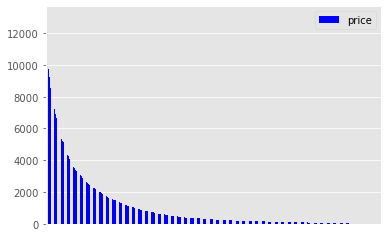

In [50]:
data_fusionned_6.plot(x="id_prod",color="b", kind="bar").axes.get_xaxis().set_visible(False)

In [51]:
#Affichage des 10 premiers produits avec leur chiffre d'affaire
df_plot_head = data_fusionned_6.head(n=10)
df_plot_head

,id_prod,price
465,0_1421,13033.48
487,0_1441,12913.20
457,0_1414,11976.84
498,0_1451,11874.06
460,0_1417,11621.54
494,0_1448,11307.18
519,0_1470,11249.28
475,0_1430,10787.85
391,0_1355,10729.35
389,0_1353,10474.76


In [52]:
#Affichage des 10 derniers produits avec leur chiffre d'affaire
df_plot_tail = data_fusionned_6.tail(n=10)
df_plot_tail

,id_prod,price
112,0_1101,1.99
665,0_1601,1.99
2079,0_807,1.99
1897,0_643,1.98
210,0_1191,1.98
1005,0_1912,1.89
313,0_1284,1.38
925,0_1840,1.28
719,0_1653,0.99
595,0_1539,0.99


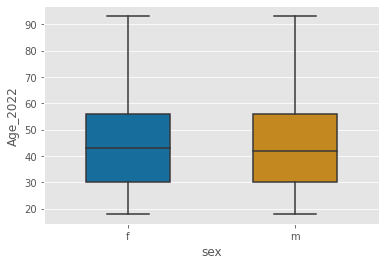

In [53]:
# Information sur les profils des clients, Repartion du chiffre d'affaire selon le profil du client et courbe de lorenz

bplot = sns.boxplot(y='Age_2022', x='sex', data=customers_df, width=0.5, palette="colorblind")


In [54]:
customers_df

,client_id,sex,birth,Age_2022
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79
...,...,...,...,...
8618,c_7920,m,1956,66
8619,c_7403,f,1970,52
8620,c_5119,m,1974,48
8621,c_5643,f,1968,54


<AxesSubplot:xlabel='Age_2022', ylabel='Count'>

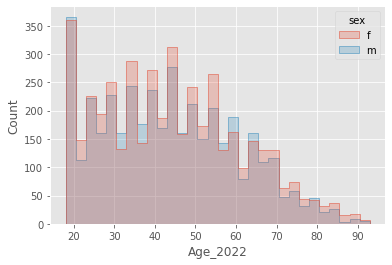

In [56]:
sns.histplot(customers_df, x="Age_2022", hue="sex", element="step")

In [57]:
data_fusionned

,id_prod,date,client_id,date_2,price,categ,sex,birth,Age_2022,Age
0,0_1518,2022,c_103,2022-05-20,4.18,0,f,1986,36,36
1,0_1518,2021,c_103,2021-07-20,4.18,0,f,1986,36,35
2,0_1518,2022,c_103,2022-08-20,4.18,0,f,1986,36,36
3,0_1418,2022,c_103,2022-06-18,8.57,0,f,1986,36,36
4,0_1418,2021,c_103,2021-08-18,8.57,0,f,1986,36,35
...,...,...,...,...,...,...,...,...,...,...
679106,2_147,2021,c_4391,2021-07-23,181.99,2,f,2001,21,20
679107,0_142,2022,c_1232,2022-03-25,19.85,0,f,1960,62,62
679108,0_142,2021,c_1232,2021-09-25,19.85,0,f,1960,62,61
679109,2_205,2021,c_7534,2021-03-11,100.99,2,m,1992,30,29


In [82]:
#Courbe de Lorenz par l'année 2021
data_fusionned_2021 = data_fusionned[data_fusionned["date"]==2021]
data_fusionned_2021

,id_prod,date,client_id,date_2,price,categ,sex,birth,Age_2022,Age
1,0_1518,2021,c_103,2021-07-20,4.18,0,f,1986,36,35
4,0_1418,2021,c_103,2021-08-18,8.57,0,f,1986,36,35
6,0_2110,2021,c_103,2021-12-27,7.04,0,f,1986,36,35
7,0_1083,2021,c_103,2021-12-21,16.99,0,f,1986,36,35
8,1_381,2021,c_103,2021-03-09,15.99,1,f,1986,36,35
...,...,...,...,...,...,...,...,...,...,...
679102,0_1692,2021,c_4478,2021-09-15,13.36,0,f,1970,52,51
679104,2_147,2021,c_4540,2021-12-05,181.99,2,m,2003,19,18
679106,2_147,2021,c_4391,2021-07-23,181.99,2,f,2001,21,20
679108,0_142,2021,c_1232,2021-09-25,19.85,0,f,1960,62,61


In [83]:
CA_total = sum(data_fusionned_2021["price"])
CA_total

4770826.560015994

In [84]:
#Compte du nombre d'individu par age
data_count = data_fusionned_2021.groupby(['Age']).size().reset_index(name='count')
data_count

,Age,count
0,17,5935
1,18,1785
2,19,1833
3,20,1664
4,21,1742
...,...,...
71,88,121
72,89,135
73,90,71
74,91,93


In [85]:
#Chiffre d'affaire par age

data_fusionned_3 = pd.DataFrame(data_fusionned_2021.groupby('Age')['price'].sum())
data_fusionned_3.reset_index(inplace=True)
data_fusionned_3

,Age,price
0,17,241265.83
1,18,72978.90
2,19,74795.77
3,20,68828.50
4,21,63614.63
...,...,...
71,88,1897.88
72,89,2153.47
73,90,1232.32
74,91,1609.32


In [86]:
#Fusion du chiffre d'affaire et du nombre d'occurence par age

data_fusionned_3 = pd.merge(data_fusionned_3, data_count,on=["Age"])
data_fusionned_3


,Age,price,count
0,17,241265.83,5935
1,18,72978.90,1785
2,19,74795.77,1833
3,20,68828.50,1664
4,21,63614.63,1742
...,...,...,...
71,88,1897.88,121
72,89,2153.47,135
73,90,1232.32,71
74,91,1609.32,93


In [87]:
data_fusionned_3["Price_percents"] = (data_fusionned_3["price"]/CA_total)*100
data_fusionned_3

,Age,price,count,Price_percents
0,17,241265.83,5935,5.057108
1,18,72978.90,1785,1.529691
2,19,74795.77,1833,1.567774
3,20,68828.50,1664,1.442695
4,21,63614.63,1742,1.333409
...,...,...,...,...
71,88,1897.88,121,0.039781
72,89,2153.47,135,0.045138
73,90,1232.32,71,0.025830
74,91,1609.32,93,0.033733


In [88]:
data_fusionned_3["Age_percents"] = (data_fusionned_3["count"]/sum(data_fusionned_3["count"]))*100
data_fusionned_3

,Age,price,count,Price_percents,Age_percents
0,17,241265.83,5935,5.057108,2.132989
1,18,72978.90,1785,1.529691,0.641514
2,19,74795.77,1833,1.567774,0.658765
3,20,68828.50,1664,1.442695,0.598028
4,21,63614.63,1742,1.333409,0.626060
...,...,...,...,...,...
71,88,1897.88,121,0.039781,0.043486
72,89,2153.47,135,0.045138,0.048518
73,90,1232.32,71,0.025830,0.025517
74,91,1609.32,93,0.033733,0.033423


In [89]:
data_fusionned_3["Age_percents"] = data_fusionned_3["Age_percents"].cumsum()
data_fusionned_3["Price_percents"] = data_fusionned_3["Price_percents"].cumsum()
data_fusionned_3

,Age,price,count,Price_percents,Age_percents
0,17,241265.83,5935,5.057108,2.132989
1,18,72978.90,1785,6.586798,2.774503
2,19,74795.77,1833,8.154572,3.433268
3,20,68828.50,1664,9.597268,4.031296
4,21,63614.63,1742,10.930677,4.657356
...,...,...,...,...,...
71,88,1897.88,121,99.876159,99.869900
72,89,2153.47,135,99.921297,99.918418
73,90,1232.32,71,99.947127,99.943935
74,91,1609.32,93,99.980860,99.977358


([<matplotlib.axis.XTick at 0x2105da68070>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

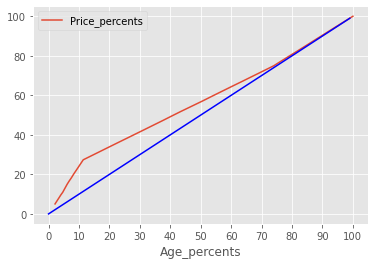

In [90]:
data_fusionned_3.plot(x ='Age_percents', y='Price_percents', kind = 'line')
plt.plot(range(0,100,1), range(0,100,1), color='blue')
plt.xticks(np.arange(0, 110, step=10))

#Pour l'année 2021, 
#On constate que le premier décile de la population représente 30 % du CA total
#et que la première moitié représente 50 % du CA total

([<matplotlib.axis.XTick at 0x2105da14910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

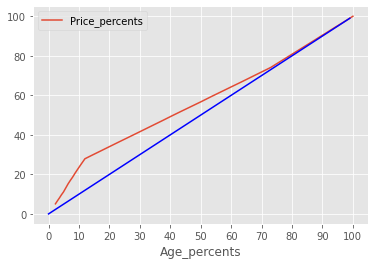

In [91]:
#Courbe de Lorenz par l'année 2022
data_fusionned_2022 = data_fusionned[data_fusionned["date"]==2022]

CA_total = sum(data_fusionned_2022["price"])

data_count = data_fusionned_2022.groupby(['Age']).size().reset_index(name='count')

data_fusionned_4 = pd.DataFrame(data_fusionned_2022.groupby('Age')['price'].sum())
data_fusionned_4.reset_index(inplace=True)

data_fusionned_4 = pd.merge(data_fusionned_4, data_count,on=["Age"])

data_fusionned_4["Price_percents"] = (data_fusionned_4["price"]/CA_total)*100

data_fusionned_4["Age_percents"] = (data_fusionned_4["count"]/sum(data_fusionned_4["count"]))*100
data_fusionned_4["Age_percents"] = data_fusionned_4["Age_percents"].cumsum()
data_fusionned_4["Price_percents"] = data_fusionned_4["Price_percents"].cumsum()

data_fusionned_4.plot(x ='Age_percents', y='Price_percents', kind = 'line')
plt.plot(range(0,100,1), range(0,100,1), color='blue')
plt.xticks(np.arange(0, 110, step=10))

#L'interpretation est quasiment similaire a l'année 2021

([<matplotlib.axis.XTick at 0x210539b7790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

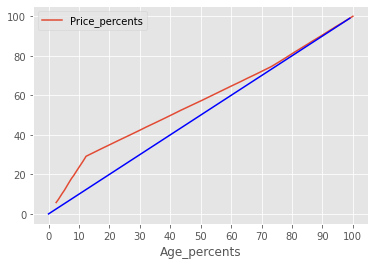

In [93]:
#Courbe de Lorenz par l'année 2023
data_fusionned_2023 = data_fusionned[data_fusionned["date"]==2023]

CA_total = sum(data_fusionned_2023["price"])

data_count = data_fusionned_2023.groupby(['Age']).size().reset_index(name='count')

data_fusionned_5 = pd.DataFrame(data_fusionned_2023.groupby('Age')['price'].sum())
data_fusionned_5.reset_index(inplace=True)

data_fusionned_5 = pd.merge(data_fusionned_5, data_count,on=["Age"])

data_fusionned_5["Price_percents"] = (data_fusionned_5["price"]/CA_total)*100

data_fusionned_5["Age_percents"] = (data_fusionned_5["count"]/sum(data_fusionned_5["count"]))*100
data_fusionned_5["Age_percents"] = data_fusionned_5["Age_percents"].cumsum()
data_fusionned_5["Price_percents"] = data_fusionned_5["Price_percents"].cumsum()

data_fusionned_5.plot(x ='Age_percents', y='Price_percents', kind = 'line')
plt.plot(range(0,100,1), range(0,100,1), color='blue')
plt.xticks(np.arange(0, 110, step=10))

#L'interpretation est quasiment similaire a l'année 2021

In [97]:
#lien entre le genre d'un client et les categories de livres achetés

data_fusionned

,id_prod,date,client_id,date_2,price,categ,sex,birth,Age_2022,Age
0,0_1518,2022,c_103,2022-05-20,4.18,0,f,1986,36,36
1,0_1518,2021,c_103,2021-07-20,4.18,0,f,1986,36,35
2,0_1518,2022,c_103,2022-08-20,4.18,0,f,1986,36,36
3,0_1418,2022,c_103,2022-06-18,8.57,0,f,1986,36,36
4,0_1418,2021,c_103,2021-08-18,8.57,0,f,1986,36,35
...,...,...,...,...,...,...,...,...,...,...
679106,2_147,2021,c_4391,2021-07-23,181.99,2,f,2001,21,20
679107,0_142,2022,c_1232,2022-03-25,19.85,0,f,1960,62,62
679108,0_142,2021,c_1232,2021-09-25,19.85,0,f,1960,62,61
679109,2_205,2021,c_7534,2021-03-11,100.99,2,m,1992,30,29


In [172]:
#Le genre et la categorie de livre sont deux variables nominales
#Il faut donc utiliser un test de chi2 pour tester l'indépendance des variables

from scipy.stats import chi2_contingency

table = pd.crosstab(data_fusionned["categ"],data_fusionned["sex"])

resultats_test = chi2_contingency(table)

print("statistique de test : ",resultats_test[0])
print("p_valeur : ",resultats_test[1])
print("degré de liberté : ",resultats_test[2])

#La p_value est inferieure à 0.05 donc les deux variables ne sont pas indépendantes

#Test de Cramer pour mesurer le niveau de correlation entre les deux variables 
V = np.sqrt((resultats_test[0]/table.sum().sum()) / (min(table.shape)-1))
V

#Le V de cramer est inferieur à 0.1, la correlation est donc faible


statistique de test :  147.119068161315
p_valeur :  1.13109805970906e-32
degré de liberté :  2


0.01471851857198826

<AxesSubplot:xlabel='categ', ylabel='price'>

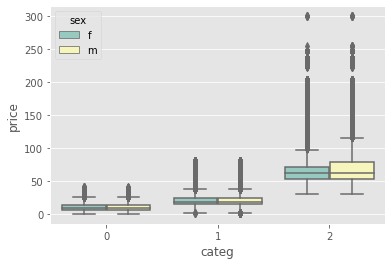

In [177]:
sns.boxplot(x="categ", y="price", hue="sex", data=data_fusionned, palette="Set3")
#Amelioration possible : normaliser les données

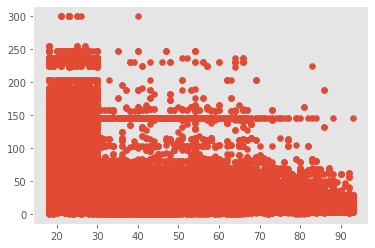

In [182]:
#Lien entre l'age des clients et le montant total des achats

#age des clients
#montant des achat : variable continue

data_correlation = data_fusionned[["Age_2022", "price"]]

axes = plt.axes()
axes.grid() 
plt.scatter(data_correlation["Age_2022"],data_correlation["price"]) 
plt.show()